In [1]:
import os
import sys
from decimal import Decimal

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload

module_path = os.path.abspath(os.path.join('/Users/wesleytatum/Desktop/m2py/m2py_Github/'))
if module_path not in sys.path:
    sys.path.append(module_path)
from m2py.utils import config
from m2py.utils import pre_processing as pre
from m2py.utils import post_processing as post
from m2py.utils import seg_label_utils as slu
from m2py.segmentation import segmentation_gmm as seg_gmm
from m2py.segmentation import segmentation_watershed as seg_water

In [2]:
map_file_path = '/Volumes/Tatum_SSD-1/Grad_School/m2py/Morphology_labels/OPV_morph_maps/3_component/'
files = os.listdir(map_file_path)
print (len(files))
print (files)

109
['.DS_Store', '100C_15min_Sub4_Dev2_domain_metrics.csv', '100C_15min_Sub4_Dev2_seg1.npy', '100C_15min_Sub4_Dev2_seg2.npy', '100C_15min_Sub4_Dev4_domain_metrics.csv', '100C_15min_Sub4_Dev4_seg1.npy', '100C_15min_Sub4_Dev4_seg2.npy', '100C_15min_Sub4_Dev7_domain_metrics.csv', '100C_15min_Sub4_Dev7_seg1.npy', '100C_15min_Sub4_Dev7_seg2.npy', '100C_30min_Sub7_Dev2_domain_metrics.csv', '100C_30min_Sub7_Dev2_seg1.npy', '100C_30min_Sub7_Dev2_seg2.npy', '100C_30min_Sub7_Dev4_domain_metrics.csv', '100C_30min_Sub7_Dev4_seg1.npy', '100C_30min_Sub7_Dev4_seg2.npy', '100C_30min_Sub7_Dev7_domain_metrics.csv', '100C_30min_Sub7_Dev7_seg1.npy', '100C_30min_Sub7_Dev7_seg2.npy', '100C_5min_Sub1_Dev3_domain_metrics.csv', '100C_5min_Sub1_Dev3_seg1.npy', '100C_5min_Sub1_Dev3_seg2.npy', '100C_5min_Sub1_Dev4_90D_domain_metrics.csv', '100C_5min_Sub1_Dev4_90D_seg1.npy', '100C_5min_Sub1_Dev4_90D_seg2.npy', '100C_5min_Sub1_Dev4_domain_metrics.csv', '100C_5min_Sub1_Dev4_seg1.npy', '100C_5min_Sub1_Dev4_seg2.npy'

.DS_Store
100C_15min_Sub4_Dev2_domain_metrics.csv
100C_15min_Sub4_Dev4_domain_metrics.csv
100C_15min_Sub4_Dev7_domain_metrics.csv
100C_30min_Sub7_Dev2_domain_metrics.csv
100C_30min_Sub7_Dev4_domain_metrics.csv
100C_30min_Sub7_Dev7_domain_metrics.csv
100C_5min_Sub1_Dev3_domain_metrics.csv
100C_5min_Sub1_Dev4_90D_domain_metrics.csv
100C_5min_Sub1_Dev4_domain_metrics.csv
125C_15min_Sub4_Dev1_domain_metrics.csv
125C_15min_Sub4_Dev2_domain_metrics.csv
125C_15min_Sub4_Dev6_domain_metrics.csv
125C_15min_Sub4_Dev7_domain_metrics.csv
125C_15min_Sub4_postexam_domain_metrics.csv
125C_30min_Sub8_Dev3_domain_metrics.csv
125C_30min_Sub8_postexam_domain_metrics.csv
125C_5min_Sub1_Dev2_domain_metrics.csv
125C_5min_Sub1_Dev3_domain_metrics.csv
125C_5min_Sub1_Dev6_domain_metrics.csv
125C_5min_Sub1_postexam_domain_metrics.csv
150C_15min_Sub4_Dev1_domain_metrics.csv
150C_15min_Sub4_Dev7_domain_metrics.csv
150C_30min_Sub7_Dev3_domain_metrics.csv
150C_5min_Sub1_Dev7_domain_metrics.csv
175C_15min_Sub4_Dev2_d

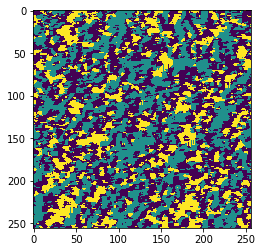

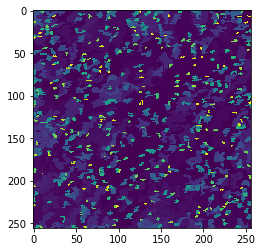

In [3]:
seg1_fl_list = []
seg2_fl_list = []

seg1_dict = {}
seg2_dict = {}

for fl in files:
    if fl[-5] == '1':
        seg1_fl_list.append(fl)
    elif fl[-5] == '2':
        seg2_fl_list.append(fl)
    else:
        print(fl)

for k, fl in enumerate(seg1_fl_list):
    seg1_dict[k] = np.load(map_file_path+fl)
    
for k, fl in enumerate(seg2_fl_list):
    seg2_dict[k] = np.load(map_file_path+fl)
    
plt.imshow(seg1_dict[0])
plt.show()
plt.imshow(seg2_dict[0])
plt.show()

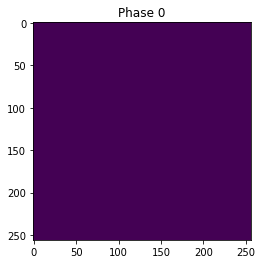

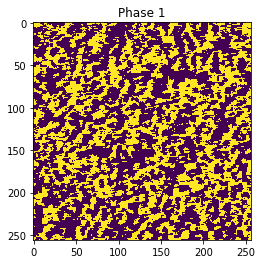

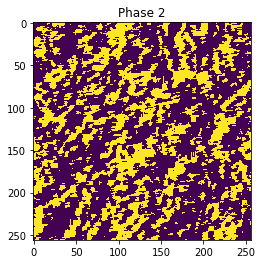

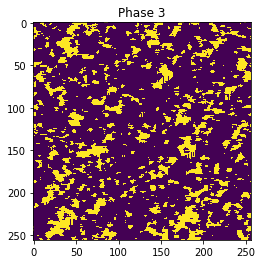

In [4]:
phase_map = seg1_dict[0]
domain_map = seg2_dict[0]

phase0 = np.asarray([x for x in phase_map == 0])
phase1 = np.asarray([x for x in phase_map == 1])
phase2 = np.asarray([x for x in phase_map == 2])
phase3 = np.asarray([x for x in phase_map == 3])

plt.imshow(phase0)
plt.title('Phase 0')
plt.show()
plt.imshow(phase1)
plt.title('Phase 1')
plt.show()
plt.imshow(phase2)
plt.title('Phase 2')
plt.show()
plt.imshow(phase3)
plt.title('Phase 3')
plt.show()

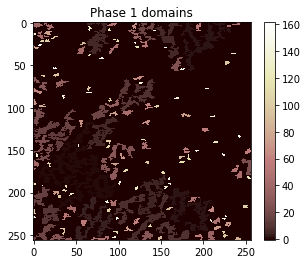

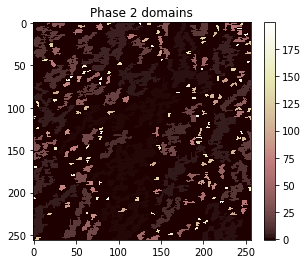

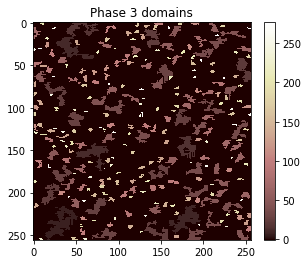

In [5]:
x,y = domain_map.shape
phase1_domains = np.zeros([x,y])
phase2_domains = np.zeros([x,y])
phase3_domains = np.zeros([x,y])

phase1_domains[phase_map == 1] = domain_map[phase_map == 1]
num_labels = len(slu.get_unique_labels(phase1_domains))
input_cmap = 'pink'
cmap = plt.get_cmap(input_cmap, num_labels)
plt.title('Phase 1 domains')
plt.imshow(phase1_domains, cmap = cmap)
post.colorbar_index(num_labels, cmap = cmap)
plt.show()

phase2_domains[phase_map == 2] = domain_map[phase_map == 2]
num_labels = len(slu.get_unique_labels(phase2_domains))
input_cmap = 'pink'
cmap = plt.get_cmap(input_cmap, num_labels)
plt.title('Phase 2 domains')
plt.imshow(phase2_domains, cmap = cmap)
post.colorbar_index(num_labels, cmap = cmap)
plt.show()


phase3_domains[phase_map == 3] = domain_map[phase_map == 3]
num_labels = len(slu.get_unique_labels(phase3_domains))
input_cmap = 'pink'
cmap = plt.get_cmap(input_cmap, num_labels)
plt.title('Phase 3 domains')
plt.imshow(phase3_domains, cmap = cmap)
post.colorbar_index(num_labels, cmap = cmap)
plt.show()

In [6]:
composite_domains = np.zeros([x,y])

composite_domains[phase1_domains != 0] = 0
composite_domains[phase2_domains != 0] = 1
composite_domains[phase3_domains != 0] = 2

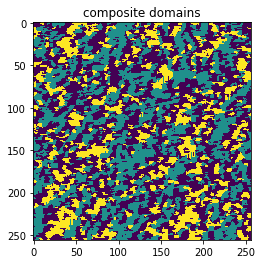

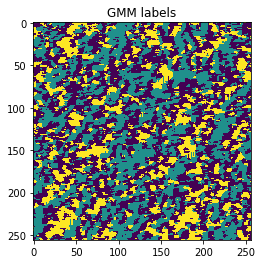

In [7]:
plt.imshow(composite_domains)
plt.title("composite domains")
plt.show()

plt.imshow(phase_map)
plt.title('GMM labels')
plt.show()

In [8]:
phase1_sizes=[]
for label in slu.get_unique_labels(phase1_domains):
    domain = phase1_domains[phase1_domains==label]
    size = len(domain)
    phase1_sizes.append(size)
    
print (phase1_sizes)

phase2_sizes=[]
for label in slu.get_unique_labels(phase2_domains):
    domain = phase2_domains[phase2_domains==label]
    size = len(domain)
    phase2_sizes.append(size)
    
print (phase2_sizes)

phase3_sizes=[]
for label in slu.get_unique_labels(phase3_domains):
    domain = phase3_domains[phase3_domains==label]
    size = len(domain)
    phase3_sizes.append(size)
    
print (phase3_sizes)

[6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 21, 23, 23, 24, 24, 24, 24, 25, 25, 25, 26, 27, 27, 27, 28, 28, 28, 30, 31, 32, 34, 34, 35, 35, 36, 37, 38, 38, 38, 41, 43, 43, 45, 45, 46, 46, 46, 47, 48, 49, 51, 51, 52, 55, 57, 61, 65, 68, 71, 82, 89, 91, 92, 93, 95, 104, 108, 116, 129, 129, 146, 163, 167, 183, 184, 217, 217, 233, 258, 280, 291, 322, 357, 391, 421, 430, 446, 536, 706, 836, 855, 2173, 4238, 4325, 5071]
[6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 17, 17, 17, 17, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 20, 20, 21, 21

In [9]:
phase1_count = sum(phase1_sizes)
phase2_count = sum(phase2_sizes)
phase3_count = sum(phase3_sizes)

print ("phase 1 frac = ", phase1_count / (phase1_count+phase2_count+phase3_count))
print ("phase 2 frac = ", phase2_count / (phase1_count+phase2_count+phase3_count))
print ("phase 3 frac = ", phase3_count / (phase1_count+phase2_count+phase3_count))

phase 1 frac =  0.4272933803368586
phase 2 frac =  0.3663454759106933
phase 3 frac =  0.2063611437524481


In [11]:
%autoreload
domain_props = slu.all_domain_properties(seg1_dict[0], seg2_dict[0])


AttributeError: module 'm2py.utils.seg_label_utils' has no attribute 'all_domain_properties'

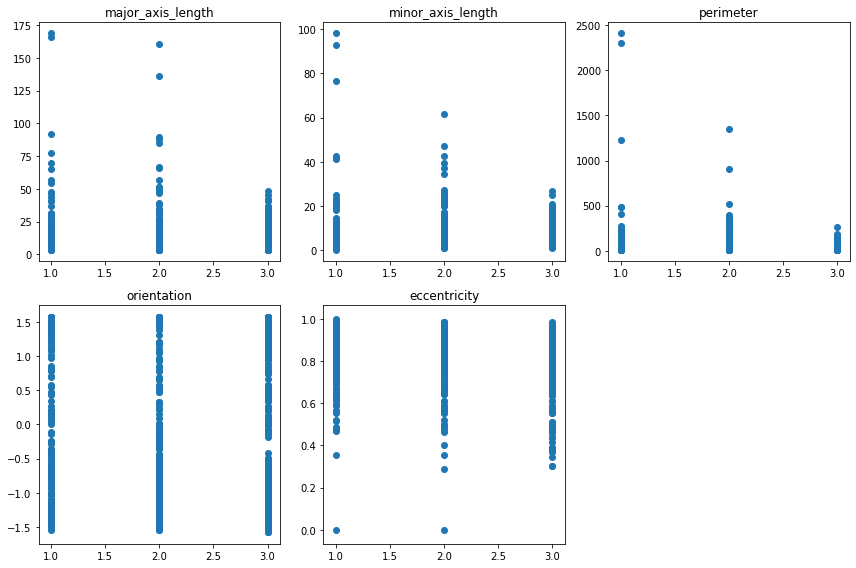

In [27]:
slu.plot_descriptors_by_phase(domain_props)